### **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **LOAD DATASET**

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', parse_dates={'datetime': ['Date', 'Time']}, 
                 infer_datetime_format=True, low_memory=False, na_values=['?'], index_col='datetime')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.index.min(), df.index.max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2010-11-26 21:02:00'))

In [6]:
df_forward = df.fillna(method='ffill')

In [7]:
df_hour = df_forward.resample('H').sum()

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

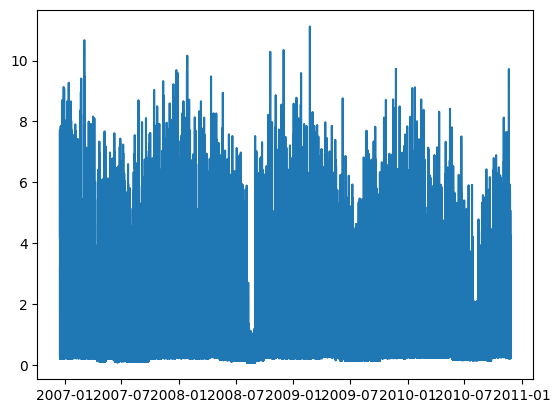

In [8]:
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.grid

In [9]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [12]:
X = df_hour[300:]
y = df_hour[:len(df_hour) - 300]

In [11]:
from prophet import Prophet

In [13]:
model = Prophet()
model.fit(X.reset_index().rename(columns={'datetime': 'ds', 'Global_active_power': 'y'}))

00:44:35 - cmdstanpy - INFO - Chain [1] start processing
00:44:57 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods= 10, freq= 'D')  
forecast = model.predict(future)   
forecast.head()  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-29 05:00:00,76.971982,3.012642,117.537161,76.971982,76.971982,-15.889183,-15.889183,-15.889183,-31.413553,...,-4.956458,-4.956458,-4.956458,20.480827,20.480827,20.480827,0.0,0.0,0.0,61.082799
1,2006-12-29 06:00:00,76.966525,29.887823,135.393339,76.966525,76.966525,4.168764,4.168764,4.168764,-11.492677,...,-4.817127,-4.817127,-4.817127,20.478568,20.478568,20.478568,0.0,0.0,0.0,81.135288
2,2006-12-29 07:00:00,76.961067,49.033818,159.081746,76.961067,76.961067,26.173254,26.173254,26.173254,10.361415,...,-4.664351,-4.664351,-4.664351,20.476190,20.476190,20.476190,0.0,0.0,0.0,103.134321
3,2006-12-29 08:00:00,76.955609,63.498167,171.432884,76.955609,76.955609,38.848555,38.848555,38.848555,22.872509,...,-4.497648,-4.497648,-4.497648,20.473694,20.473694,20.473694,0.0,0.0,0.0,115.804164
4,2006-12-29 09:00:00,76.950152,58.057940,168.114399,76.950152,76.950152,37.611393,37.611393,37.611393,21.456809,...,-4.316497,-4.316497,-4.316497,20.471081,20.471081,20.471081,0.0,0.0,0.0,114.561544


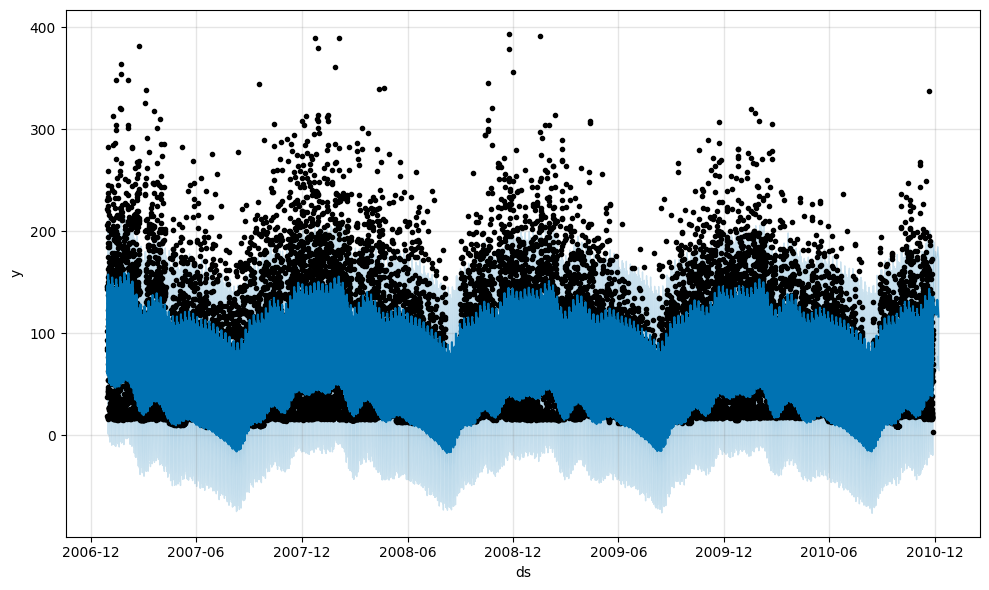

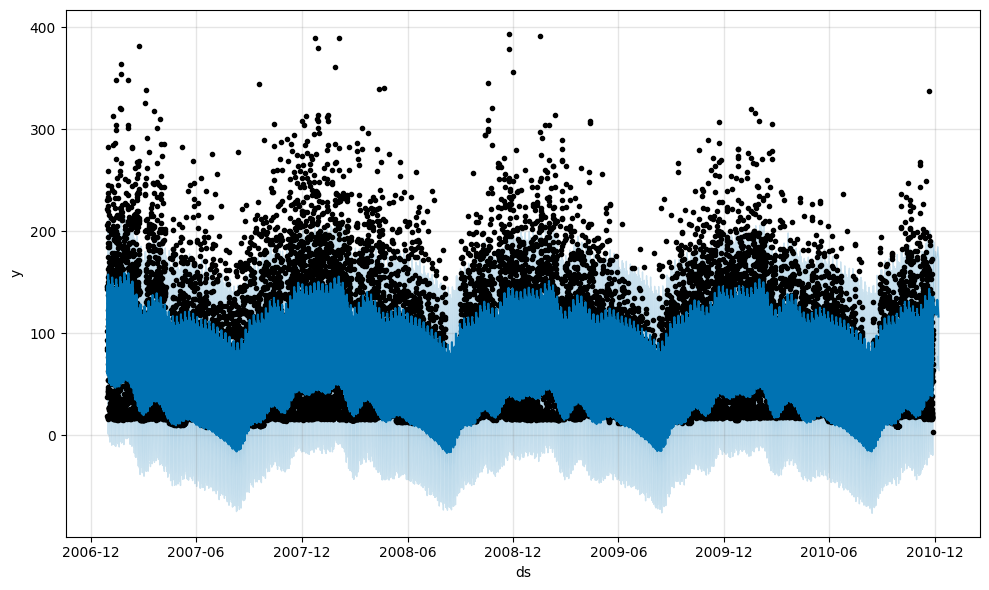

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]  
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries  
model.plot(forecast) 

In [18]:
plot_components_plotly(model, forecast)

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get the actual values
y_actual = y['Global_active_power'].values

# Make predictions
y_pred = model.predict(X.reset_index().rename(columns={'datetime': 'ds', 'Global_active_power': 'y'}))['yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

# Calculate MAPE
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 53.43441610727786
MAPE: 114.29200113260454


In [15]:
from prophet.plot import plot_plotly, plot_components_plotly